In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Cargar datos
df = pd.read_csv('datos_clientes.csv')
df.head()

,cliente_id,genero,edad,estado,piezas_compradas,monto_compra,fecha_ultima_compra
0,1,Femenino,20.0,Puebla,4,306.37,2023-01-28
1,2,Masculino,23.0,Jalisco,5,504.72,2023-01-14
2,3,Masculino,38.0,Puebla,3,383.52,2023-09-03
3,4,Masculino,23.0,CDMX,3,262.49,2023-06-14
4,5,Femenino,46.0,Yucatán,3,227.81,2023-04-22


In [63]:
# Revisar valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cliente_id           10000 non-null  int64  
 1   genero               10000 non-null  object 
 2   edad                 9800 non-null   float64
 3   estado               10000 non-null  object 
 4   piezas_compradas     10000 non-null  int64  
 5   monto_compra         9900 non-null   float64
 6   fecha_ultima_compra  10000 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


In [64]:
# Revisar estadísticas básicas para detectar outliers
print("Estadistica descriptiva:")
df.describe()

Estadistica descriptiva:


,cliente_id,edad,piezas_compradas,monto_compra
count,10000.00000,9800.000000,10000.00000,9900.000000
mean,5000.50000,34.614796,3.00640,500.457783
std,2886.89568,9.973385,1.73858,150.357738
min,1.00000,-4.000000,0.00000,-91.690000
25%,2500.75000,28.000000,2.00000,399.325000
50%,5000.50000,35.000000,3.00000,502.040000
75%,7500.25000,41.000000,4.00000,601.892500
max,10000.00000,79.000000,13.00000,1078.490000


In [65]:
# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular percentiles sobre columnas numéricas
print("\nPercentiles (0.95 y 0.99):")
print(df_numeric.quantile([0.95, 0.99]))



Percentiles (0.95 y 0.99):
      cliente_id  edad  piezas_compradas  monto_compra
0.95     9500.05  51.0               6.0      749.4115
0.99     9900.01  58.0               8.0      850.7867


In [66]:

# Limpieza básica reemplazando valores nulos por la media o mediana
df['edad'].fillna(df['edad'].median())
df['monto_compra'].fillna(df['monto_compra'].median())

0       306.37
1       504.72
2       383.52
3       262.49
4       227.81
         ...  
9995    562.93
9996    265.69
9997    473.05
9998    715.95
9999    344.17
Name: monto_compra, Length: 10000, dtype: float64

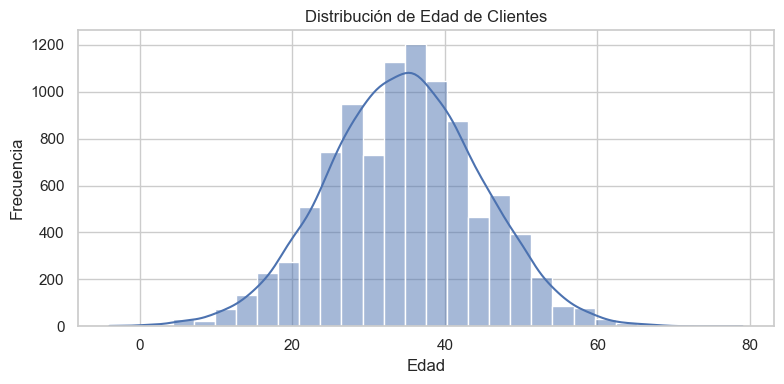

In [67]:
# Análisis de la distribución de edad, piezas compradas y montos

# Estilo para visualizaciones
sns.set(style="whitegrid")

# Distribución de Edad
plt.figure(figsize=(8, 4))
sns.histplot(df["edad"], bins=30, kde=True)
plt.title("Distribución de Edad de Clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

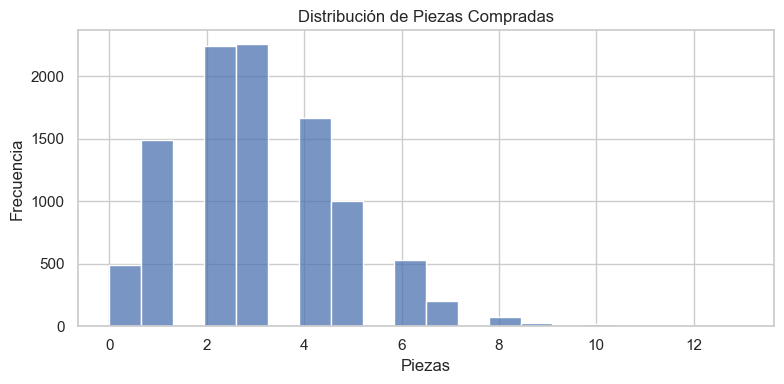

In [68]:
# Distribución de Piezas Compradas
plt.figure(figsize=(8, 4))
sns.histplot(df["piezas_compradas"], bins=20, kde=False)
plt.title("Distribución de Piezas Compradas")
plt.xlabel("Piezas")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

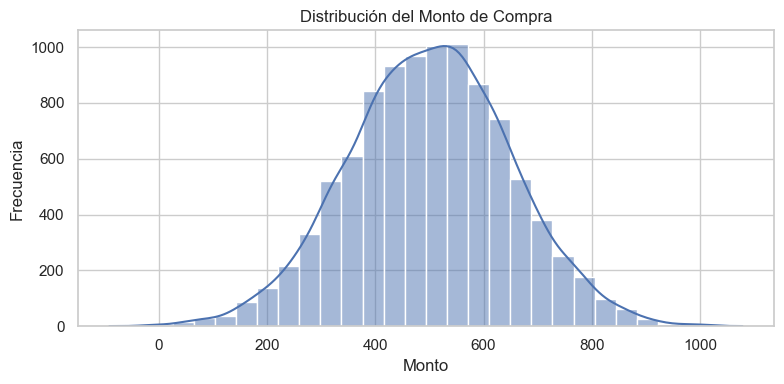

In [69]:
# Distribución del Monto de Compra
plt.figure(figsize=(8, 4))
sns.histplot(df["monto_compra"], bins=30, kde=True)
plt.title("Distribución del Monto de Compra")
plt.xlabel("Monto")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


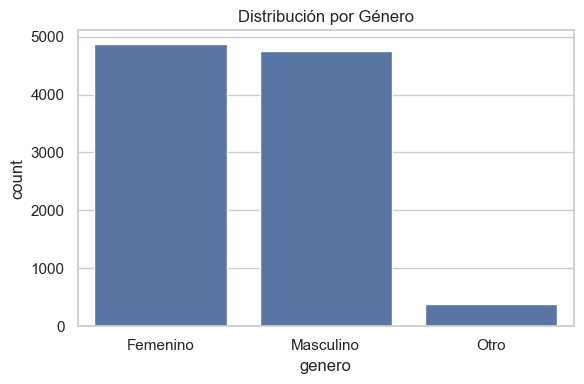

In [70]:
# Detección de sesgos en género o ubicación

# Conteo por género
plt.figure(figsize=(6, 4))
sns.countplot(x="genero", data=df)
plt.title("Distribución por Género")
plt.tight_layout()
plt.show()

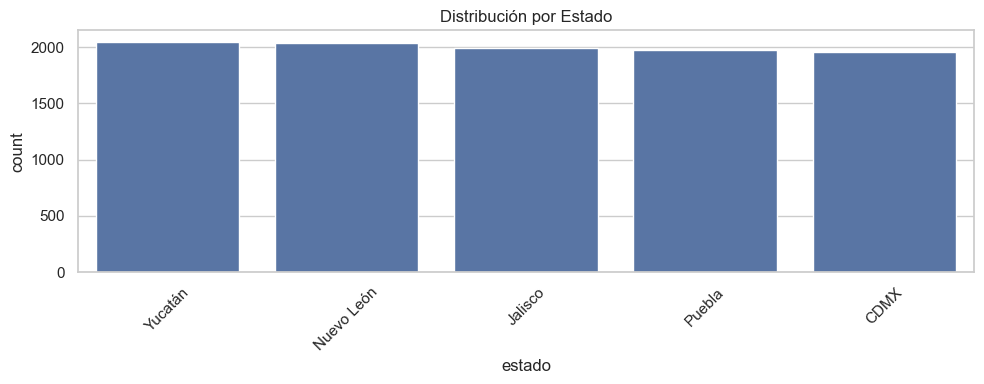

In [71]:
# Conteo por estado
plt.figure(figsize=(10, 4))
sns.countplot(x="estado", data=df, order=df["estado"].value_counts().index)
plt.title("Distribución por Estado")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


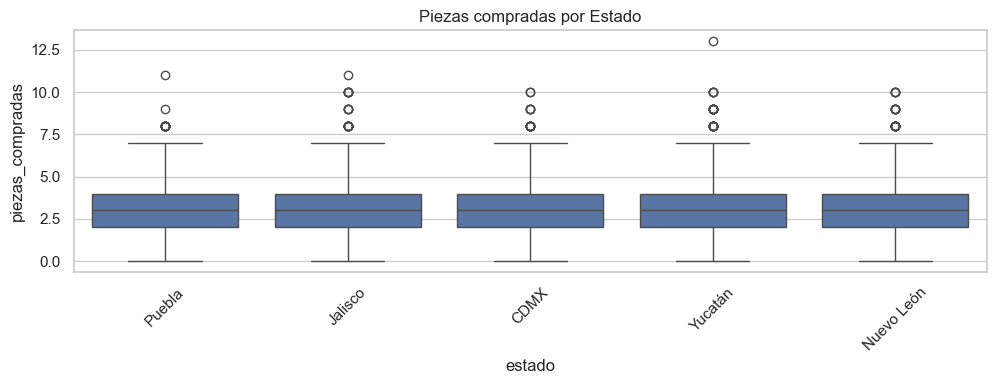

In [72]:
# Piezas compradas por estado (boxplot)
plt.figure(figsize=(10, 4))
sns.boxplot(x="estado", y="piezas_compradas", data=df)
plt.title("Piezas compradas por Estado")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


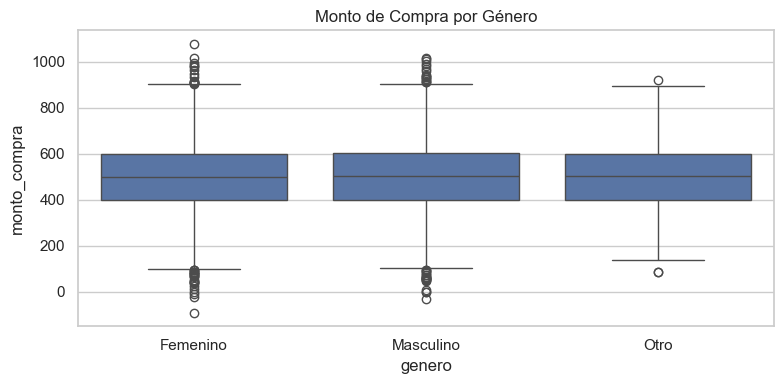

In [73]:
# Monto de compra por género
plt.figure(figsize=(8, 4))
sns.boxplot(x="genero", y="monto_compra", data=df)
plt.title("Monto de Compra por Género")
plt.tight_layout()
plt.show()

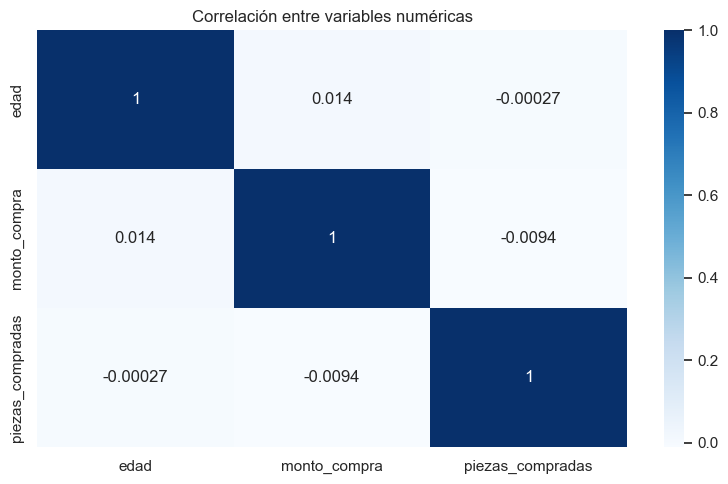

In [74]:
# Correlación entre variables numéricas
plt.figure(figsize=(8, 5))
sns.heatmap(df[["edad", "monto_compra", "piezas_compradas"]].corr(), annot=True, cmap="Blues")
plt.title("Correlación entre variables numéricas")
plt.tight_layout()
plt.show()